In [1]:
#Input NPM
NPM = ""

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = ["https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843",
             ""]

## PR 2 Linear and Logistic Regression

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Linear Regression](#Soal-1)
    * [Soal 2 - Analisis Linear Regression](#Soal-2)
    * [Soal 3 - Implementasi Logistic Regression](#Soal-3)
    * [Soal 4 - Analisis Logistic Regression](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Linear Regression adalah insurance.csv dan untuk Logistic Regression adalah data yang sama dengan PR 1 yaitu pasien_liver.csv

* Berikut ketentuan pengerjaan PR 2:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya Numpy, Pandas, dan Matplotlib 

   - Berikan penjelasan singkat mengenai code yang Anda buat

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [63]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

## Soal 1 
### Linear Regression (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Linear Regression untuk mencari hubungan antara atribut-atribut yang ada pada data dalam mempengaruhi harga self insurance seseorang
* Data yang digunakan memiliki 5 fitur, yaitu age, sex, bmi, children, smoke. Charges adalah variabel target yang akan diprediksi

In [64]:
data_linreg = pd.read_csv("insurance.csv") #load the dataset
data_linreg.head(10)

age     sex     bmi  children smoker      charges
0   19  female  27.900       0.0    yes  16884.92400
1   18    male  33.770       1.0     no   1725.55230
2   28    male  33.000       3.0     no   4449.46200
3   33    male  22.705       0.0     no  21984.47061
4   32    male  28.880       0.0     no   3866.85520
5   31  female  25.740       0.0     no   3756.62160
6   46  female  33.440       1.0     no   8240.58960
7   37  female  27.740       3.0     no   7281.50560
8   37    male  29.830       2.0     no   6406.41070
9   60  female  25.840       0.0     no  28923.13692

Silahkan melakukan preprocessing data. Beberapa preprocessing yang bisa dilakukan antara lain melakukan encode pada data kategori, menangani missing value, normalisasi data value, dan sebagainya

In [65]:
# PREPROCESSING DATA
data_linreg = data_linreg.dropna()
data_linreg = data_linreg.reset_index(drop=True)
linreg_encoded_value = {}
linreg_encoded_value['sex'] = {
    'male':0,
    'female':1
}
linreg_encoded_value['smoker'] = {
    'yes':1,
    'no':0
}
data_linreg.replace(linreg_encoded_value,inplace=True)
data_linreg

age  sex     bmi  children  smoker      charges
0      19    1  27.900       0.0       1  16884.92400
1      18    0  33.770       1.0       0   1725.55230
2      28    0  33.000       3.0       0   4449.46200
3      33    0  22.705       0.0       0  21984.47061
4      32    0  28.880       0.0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1330   50    0  30.970       3.0       0  10600.54830
1331   18    1  31.920       0.0       0   2205.98080
1332   18    1  36.850       0.0       0   1629.83350
1333   21    1  25.800       0.0       0   2007.94500
1334   61    1  29.070       0.0       1  29141.36030

[1335 rows x 6 columns]

In [66]:
# Pembagian fitur dan label
features = data_linreg.drop(["charges"], axis=1).values
label = data_linreg['charges'].values


Tanpa menggunakan library external, implementasikan fungsi hipotesis h(x)

$$ h(x) = w^Tx $$

dengan w adalah bobot dan x direpresentasikan sebagai list dengan panjang yang sama dengan w

In [67]:
def h(x,w):
    #global w
    x= np.array(x)
    w = np.array(w)
    return sum(x*w)
    # YOUR CODE HERE
    # raise NotImplementedError()

In [68]:
# code ini digunakan untuk memeriksa apakah fungsi h yang Anda implementasikan sudah sesuai
w, x = [1,2,3], [2,3,4]
assert is_similar(h(x,w),20)
print(is_similar(h(x,w),20))
w, x = [-1,-1,-1], [2,3,4]
assert is_similar(h(x,w),-9)

True


tanpa menggunakan library eksternal, gunakan h yang sudah diemplementasikan di atas untuk mengimplementasikan cost funtion $J(w)$ untuk Linear Regression

$$J(w) = \frac{1}{2}\sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$

In [69]:
def cost_func_linreg(X, y,w):
    m = len(y)
    feature_and_target = list(zip(X,y))
    #replace xi dan yi yang di rumus dengan pi dan qi respectively
    hwxiyi = [(h(p,w)-q)**2 for p,q in feature_and_target] 
    result = sum(hwxiyi)
    result /=2
    return result
        
    # YOUR CODE HERE

    raise NotImplementedError()

In [70]:
# code ini digunakan untuk memeriksa apakah cost function yang Anda implementasikan sudah sesuai
w, X, y = [-1, 0], [[1,1],[0,1]], [-1,0]
assert is_similar(cost_func_linreg(X,y,w),0)
print(is_similar(cost_func_linreg(X,y,w),0))
w, X, y = [1, 1, 2], [[1,1,1],[0,0,0]], [0,0]
assert is_similar(cost_func_linreg(X,y,w),8)
print(is_similar(cost_func_linreg(X,y,w),8))

True
True


tanpa menggunakan library eksternal, gunakan cost function di atas untuk mengimplementasikan satu iterasi dari stochastic gradient descent

In [71]:
# lr adalah learning rate
# wn = wn + alpha*(y - hw(x_i))*x[i][j]
def SGD(X, y,w, lr=1e-4):
    #global w
    w = np.array(w)
    alpha, m = lr, len(y)
    for i in range(m):
        # YOUR CODE HERE     
        for j in range(0,len(w)):
            w[j] = w[j]+lr*((y[i]-h(X[i],w))*X[i][j])
       
    return w

implementasikan fungsi is_convergen untuk menentukan termination condition (slide kuliah halaman 18). Anda bisa menambahkan parameter yang sesuai dengan termination condition yang dipilih. Fungsi ini akan mengembalikan nilai boolean termination_condition

In [72]:
LA = np.linalg
def is_convergen(wlama,wbaru,error):
    # YOUR CODE HERE
    termination_condition = False
    diff = wbaru-wlama
    diff = LA.norm(diff)
    if diff<=0:
        termination_condition = True
    return termination_condition

cost func before 213201237760.37933
weight before [1, 2, 3, 4, 5]
is convergen
iteration needed:  4
cost func after 4 iteration [1.20957009e+19 1.20957010e+19 1.20957008e+19 1.20957010e+19
 1.20957010e+19]
weight after 4 iteration [266   0  78   0   5]

cost/loss func plot


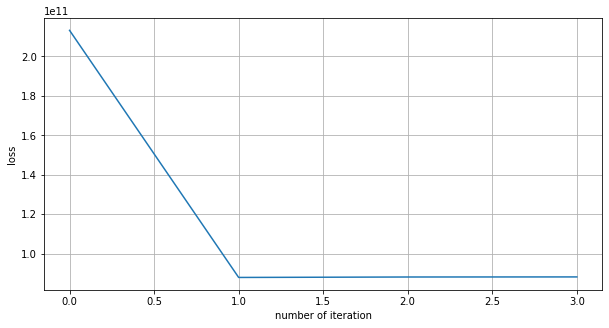

In [74]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

featur_experiment = [[4,1],[2,8],[1,0],[3,2],[1,4],[6,7]]
target_experiment = [2,-14,1,-1,-7,-8]




w, fetures, label = [1, 2, 3, 4, 5], features, label
history = []
print('cost func before', cost_func_linreg(features, label,w))
print('weight before', w)
# wbaru = SGD(features,label,w)
# print('weight after',wbaru)


# 
number_of_iteration = 0

#bagian ini dapat anda modifikasi sesuai dengan fungsi is_convergen yang telah dibuat diatas
while True:
    history.append(cost_func_linreg(features, label,w))
    wlama = w
    w = SGD(features, label, w,lr=0.00001)
    number_of_iteration += 1
    if (number_of_iteration>100):
        print("iterasi exceeded")
        break;
    if (is_convergen(wlama,w,error=1e-10)):
        print("is convergen")
        break

print("iteration needed: ",number_of_iteration)
        
    
print('cost func after ' + str(number_of_iteration) + ' iteration ' + str(cost_func_linreg(w,features, label)))
print('weight after ' + str(number_of_iteration) + ' iteration ' + str(w))

print('\ncost/loss func plot')
plt.figure(figsize=(10,5))
plt.plot(history)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

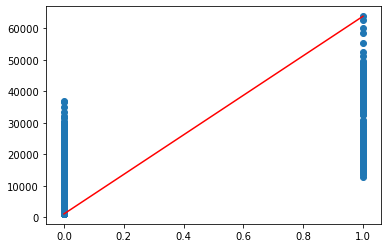

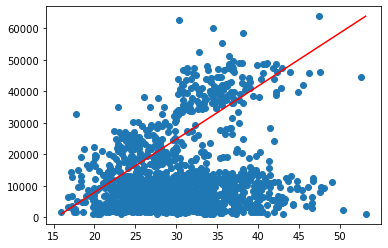

In [82]:
import seaborn as sns

# visualisasikan variabel charges dan 1 fitur yang menurut Anda berpengaruh paling besar pada charges kedalam 2D plot

def linreg_plot(feature, label):
    plt.scatter(feature, label)
    plt.plot([min(feature), max(feature)], [min(label), max(label)], color='red') # predicted
    plt.show()

dt_features = pd.DataFrame(np.array(features), columns=data_linreg.columns[:-1])

def correlation_heatmap(dataset):
    corrmat = dataset.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    g = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#correlation_heatmap(data_linreg)

# Ambil fitur yang Anda pilih dari dt_features dengan mengganti "FITUR X"
feature1 = dt_features['smoker'].to_numpy()
linreg_plot(feature1, label)
feature2 = dt_features['bmi'].to_numpy()
linreg_plot(feature2, label)

## Soal 2 
### Analisis Linear Regression (5 poin)
* Jelaskan secara singkat analisis Anda terhadap hasil Linear Regression yang didapatkan
Linear regression yang saya dapatkan menggunakan metode stocastic gradient descent, dengan termination method menggunakan ||w'-w|| <= error
Banyaknya iterasi yang dibutuhkan sangat tergantung pada learning rate yang diberikan dan juga error yang diberikan, dan learning rate serta error tidak berkorelasi dengan banyaknya iterasi


## JAWABAN

## Soal 3  
### Logistic Regression (20 poin)
* Pada soal ini Anda diminta untuk mengimplementasikan Logistic Regression untuk klasifikasi pasien liver atau non liver, jika diketahui atribut-atribut yang ada pada pasien_liver.csv

In [2]:
data_logreg = pd.read_csv("pasien_liver.csv", header=None)
# columns = {0:'usia',1:'jenis_kelamin',2:'TB',3:'DB',4:'AAP',5:'Sgpt',6:'Sgot',7:'TP',8:'ALB',9:'AG_Ratio',10:'target'}
# data_logreg = data_logreg.rename(columns=columns)
data_logreg.head(10)

0       1     2     3      4      5    6    7    8     9   10
0  30  Female   0.7   0.2   63.0   31.0   27  5.8  3.4  1.40   1
1  29    Male   1.0   0.3   75.0   25.0   26  5.1  2.9  1.30   1
2  50    Male   7.3   3.7   92.0   44.0  236  6.8  1.6  0.30   1
3  45    Male   1.1   0.4   92.0   91.0  188  7.2  3.8  1.11   1
4  52    Male   1.8   0.8   97.0   85.0   78  6.4  2.7  0.70   1
5  40    Male   0.6   0.1   98.0   35.0   31  6.0  3.2  1.10   1
6  58    Male   0.4   0.1  100.0   59.0  126  4.3  2.5  1.40   1
7  72    Male   0.6   0.1  102.0   31.0   35  6.3  3.2  1.00   1
8  62    Male   5.0   2.1  103.0   18.0   40  5.0  2.1  1.72   1
9  35    Male  26.3  12.1  108.0  168.0  630  9.2  2.0  0.30   1

Silahkan melakukan preprocessing data jika diperlukan. Anda bisa menggunakan preprocessing yang telah Anda lakukan pada PR 1

In [3]:
# PREPROCESSING DATA
data_logreg = data_logreg.dropna()
data_logreg = data_logreg.reset_index(drop=True)
logreg_encoded_value = {}
logreg_encoded_value[1] = {
    'Male':0,
    'Female':1
}
logreg_encoded_value[10] = {
    1:0,
    2:1
}
data_logreg.replace(logreg_encoded_value,inplace=True)
data_logreg.head(10)

0   1     2     3      4      5    6    7    8     9   10
0  30   1   0.7   0.2   63.0   31.0   27  5.8  3.4  1.40   0
1  29   0   1.0   0.3   75.0   25.0   26  5.1  2.9  1.30   0
2  50   0   7.3   3.7   92.0   44.0  236  6.8  1.6  0.30   0
3  45   0   1.1   0.4   92.0   91.0  188  7.2  3.8  1.11   0
4  52   0   1.8   0.8   97.0   85.0   78  6.4  2.7  0.70   0
5  40   0   0.6   0.1   98.0   35.0   31  6.0  3.2  1.10   0
6  58   0   0.4   0.1  100.0   59.0  126  4.3  2.5  1.40   0
7  72   0   0.6   0.1  102.0   31.0   35  6.3  3.2  1.00   0
8  62   0   5.0   2.1  103.0   18.0   40  5.0  2.1  1.72   0
9  35   0  26.3  12.1  108.0  168.0  630  9.2  2.0  0.30   0

In [4]:
# Pembagian fitur dan label
classification_data = data_logreg.drop([10], axis=1).values
classification_label = data_logreg[10].values

In [48]:
# Rererensi perbedaan predict dan predict_proba https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/4
# Anda dapat berkreasi pada method yang Anda buat. Hint hanya untuk membantu Anda dalam pengerjaan (tidak harus sama dengan hint yang diberikan)

class LogisticRegression:
    def __init__(self,w, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
        self.w = w
        self.threshold = 0.5
    
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
   
    
    def hx(self,x,weight):
        x= np.array(x)
        weight= np.array(weight)
        return self.sigmoid(np.dot(x,weight))
    
    def gradient_ascend(self,X,y):
        m = len(y)
        n = len(self.w)
        alpha = self.lr
        for i in range(m):
            for j in range(0,n):
                self.w[j] = self.w[j]+alpha*((y[i]-self.hx(X[i],self.w)))*X[i][j]
        return self.w
    
    def fit(self, X, y):
        '''Build a logistic regression classifier from the training set (X, y)'''
        # YOUR CODE HERE
        for i in range(self.num_iter):
            self.w = self.gradient_ascend(X,y)
        #raise NotImplementedError()

    def predict_proba(self, X):
        '''Predict class probabilities of the input samples X'''
        '''hint: you can put or call your sigmoid function here to predict probablity of input sample X'''
        result = self.hx(X,self.w)
        #print("predict_probanya",result)
        return result
        # YOUR CODE HERE
        #raise NotImplementedError()

    def predict(self, X, threshold=0.5): # default threshold adalah 0.5
        '''Predict class value for X'''
        '''hint: you can use predict_proba function to classify based on given threshold'''
        # YOUR CODE HERE
        print("kenapa gak berubah :(")
        result = self.predict_proba(X)
        result = np.array(result)
        result = np.floor(result)
        result = np.array([int(x) for x in result])
        return result
        # unique,counts = np.unique(result,return_counts=True)
        # occurence = dict(zip(unique, counts))
        # if occurence[1.0]/len(result) >= threshold: return 1
        # return 0
        #raise NotImplementedError()

In [42]:
w_logreg = [i+1 for i in range(classification_data.shape[1])]
model = LogisticRegression(w_logreg,lr=0.1, num_iter=10)
%time model.fit(classification_data, classification_label)

e:\kuliah\semester 6\dsa\coba coba\venv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Wall time: 375 ms


### Implementasi Logistic Regression Model dalam training dan testing data
* Silahkan melakukan pembagian data untuk training dan testing (default 60:40)

In [8]:
from random import seed
from random import randrange
from numpy import empty

# Split a dataset into a train and test set
def train_test_split(data, label, split=0.60):
    train_data = []
    train_label = []
    train_size = split * len(data)
    data_copy = data.tolist()
    label_copy = label.tolist()
    while len(train_data) < train_size:
        index = randrange(len(data_copy))
        train_data.append(data_copy.pop(index))
        train_label.append(label_copy.pop(index))
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    data_copy = np.array(data_copy)
    label_copy = np.array(label_copy)
    return train_data, train_label, data_copy, label_copy  

In [9]:
# test train/test split
seed(5)
x_train_clf, y_train_clf, x_val_clf, y_val_clf = train_test_split(classification_data, classification_label)

In [76]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

# logreg_model = LogisticRegression(w_logreg,lr=0.1, num_iter=1000)
# logreg_model.fit(x_train_clf, y_train_clf)
#logreg_y_predict = model.predict(x_val_clf)
logreg_model2 = LogisticRegression(w_logreg,lr=0.01,num_iter=1000)
%time logreg_model2.fit(x_train_clf,y_train_clf)

e:\kuliah\semester 6\dsa\coba coba\venv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
e:\kuliah\semester 6\dsa\coba coba\venv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Wall time: 25.1 s


## Evaluasi

In [26]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("* Confusion Matrix") 
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), \
            index = ['Actual Pasien Liver', 'Actual Pasien Non-Liver'], \
            columns = ['Pred Pasien Liver', 'Pred Pasien Non-Liver'])) 
      
    print ("\n* Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\n* Classification Report :\n", 
    classification_report(y_test, y_pred)) 

In [58]:
logreg_y_predict = (logreg_model2.predict(x_val_clf))
print(logreg_y_predict)

kenapa gak berubah :(
[0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1
 1 1]


e:\kuliah\semester 6\dsa\coba coba\venv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [60]:
cal_accuracy(y_val_clf, logreg_y_predict)

* Confusion Matrix
                         Pred Pasien Liver  Pred Pasien Non-Liver
Actual Pasien Liver                     28                      8
Actual Pasien Non-Liver                 18                     22

* Accuracy :  65.78947368421053

* Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.78      0.68        36
           1       0.73      0.55      0.63        40

    accuracy                           0.66        76
   macro avg       0.67      0.66      0.66        76
weighted avg       0.67      0.66      0.65        76



## Soal 4  
### Analisis Logistic Regression (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil Logistic Regression yang didapatkan

Dengan menggunakan train split test ration 60:40 dan 1000 kali iterasi, didapatkan akurasi sebesar 65.3%. 
Hasil akurasi ini sifatnya fluktuatif dan tidak ada pattern yang menentukan hasil akurasi.
Jika kita tidak beruntung dalam menebak weight awal, maka iterasi yang dibutuhkan untuk mencapai akurasi optimal bisa banyal.

2. Jelaskan secara singkat perbedaan hasil evaluasi dari Decision Tree pada PR 1 dan Logistic Regression yang didapatkan pada soal 3 dan mengapa perbedaan tersebut bisa terjadi
hasil

Tidak ada perbedaan signifikan antara hasil perediksi Menggunakan Logistic Regression dan Decision Tree, karena akurasinya masih berada di kisaran 60%-an


## JAWABAN